## Análisis de Componentes Principales (PCA)

[[0.9973857  0.99607843 0.9921568  ... 0.38169935 0.38823533 0.3803922 ]
 [0.14771242 0.19738562 0.1751634  ... 0.45751634 0.44444445 0.53594774]
 [0.34379086 0.39477125 0.49150327 ... 0.709804   0.72156864 0.7163399 ]
 ...
 [0.3633987  0.3372549  0.30718955 ... 0.19738562 0.22091503 0.19346406]
 [0.19346406 0.24705882 0.34248367 ... 0.7346406  0.6640523  0.6117647 ]
 [0.11633987 0.10196079 0.1267974  ... 0.13333334 0.13725491 0.2535948 ]]
#features:1850


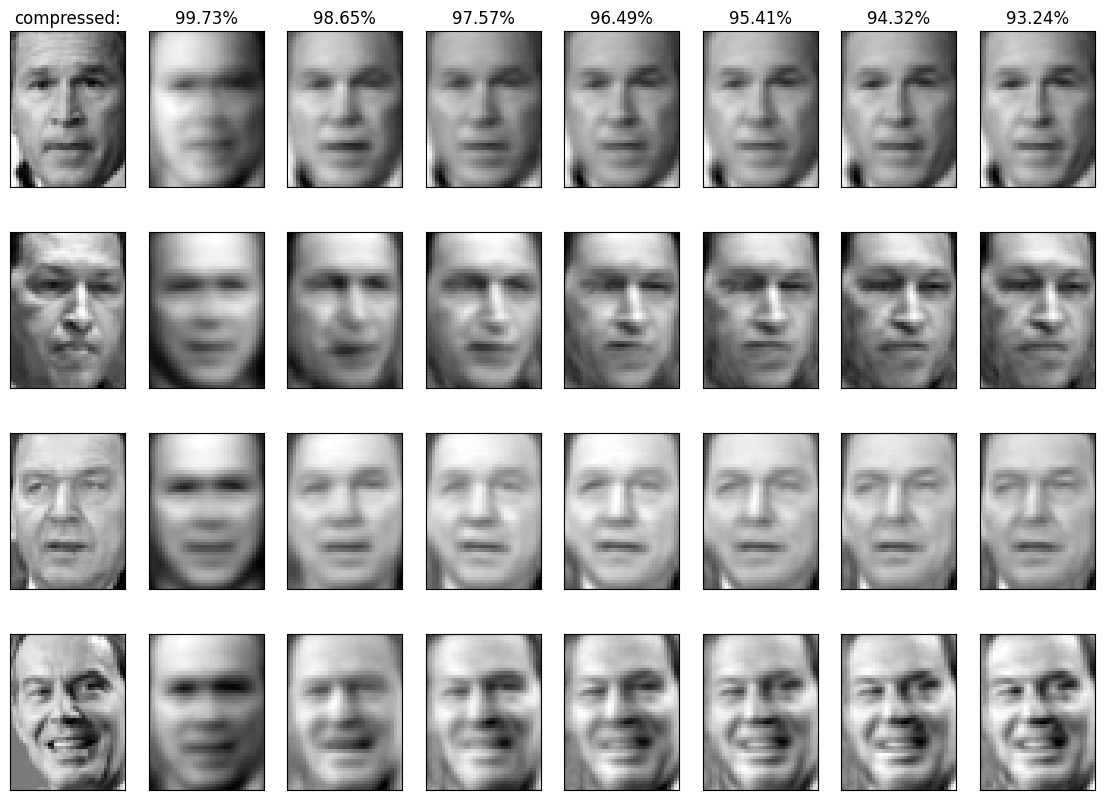

In [7]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

lfw = fetch_lfw_people(min_faces_per_person=70,resize=0.4)
X=lfw.data 
print(X) # Imprime la matriz de datos.
n_features=X.shape[1]
print("#features:"+str(n_features))

n_samples, h, w= lfw.images.shape

def plot_gallery(images, height, width, n_row, n_col, cmap=plt.cm.gray):
    fig, axs = plt.subplots(n_row,n_col, figsize=(14,10),
                            subplot_kw={'xticks':(), 'yticks':()})
    for i, image in zip(range(n_row*n_col), images):
        r = int(i/n_col); c = i%n_col
        axs[r,c].imshow(image.reshape((h, w)), cmap=cmap) 
        if (r == 0): 
            if(c == 0):
                axs[r,c].set_title('compressed:')  
            else:
                axs[r,c].set_title('{:.2f}'.format(
                                   100-(5+(c-1)*20)*100/n_features) + '%')



n_components = 300
images = []
for face in [100,150,300,400]:  # some faces from the dataset samples
    images.append(X[face])  # draw the original image
    for compressed in range(5,126,20):
        estimator = PCA(n_components=compressed, svd_solver='randomized')
        W = estimator.fit_transform(X)
        # draws the compressed image
        images.append(estimator.inverse_transform(W[face]))  

plot_gallery(images, h, w, 4, 8)
plt.show()

(18, 1850)


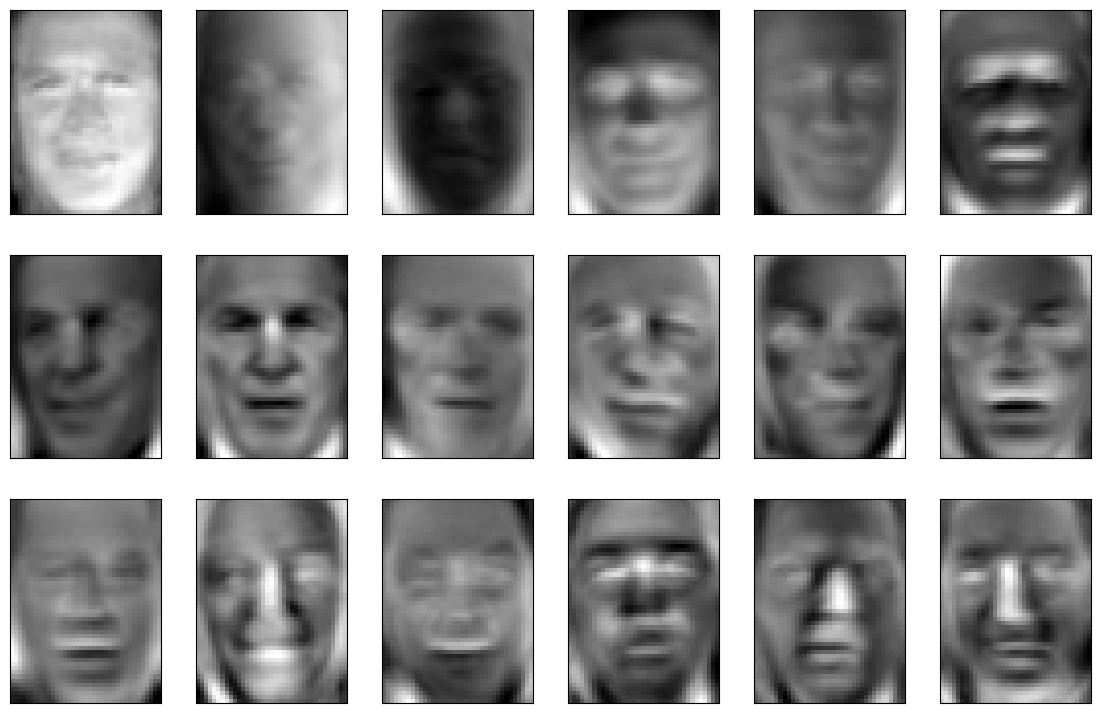

In [8]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

lfw = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw.data
n_samples, h, w = lfw.images.shape

def plot_gallery(images, height, width, n_row, n_col, cmap=plt.cm.gray):
    fig, axs = plt.subplots(n_row,n_col, figsize=(14,9),
                            subplot_kw={'xticks':(), 'yticks':()})
    for i, image in zip(range(n_row*n_col), images):
        r = int(i/n_col); c = i%n_col
        axs[r,c].imshow(image.reshape((h, w)), cmap=cmap) 

pca = PCA(n_components=18, svd_solver='randomized').fit(X) 

print(pca.components_.shape)
plot_gallery(pca.components_, h, w, 3, 6)
plt.show()


[5 6 3 ... 5 3 5]


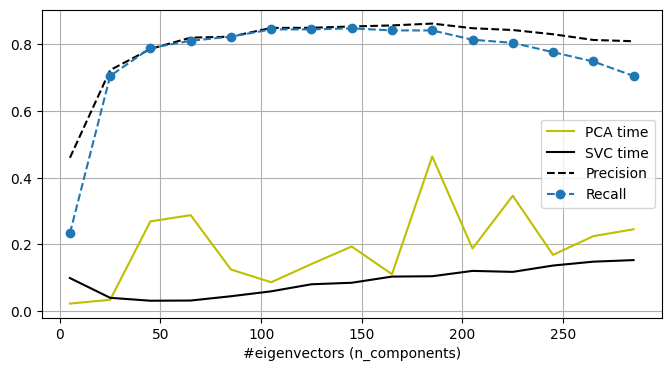

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from time import time
import numpy as np
import matplotlib.pyplot as plt

lfw = fetch_lfw_people(min_faces_per_person=70)
X = lfw.data
y = lfw.target



n_samples, h, w = lfw.images.shape
n_features = X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

PCA_time = []; SVC_time = []; test_precision = []; test_recall = []

for n_eigenvectors in range(5,300,20):
    #print(int((300-n_eigenvectors)/20), end = " ")
    t0 = time()
    pca = PCA(n_components=n_eigenvectors, whiten=True).fit(X_train)
    PCA_time.append(time() - t0)

    # we have chosen to use fit, and then transform
    X_train_pca = pca.transform(X_train)  
    X_test_pca = pca.transform(X_test)    # instead fit_transform
  
    t0 = time()
    svc = SVC(C = 1000, gamma = 0.005, kernel='rbf',class_weight='balanced') # con valores de regularización  c y gama.
    svc = svc.fit(X_train_pca, y_train)
    SVC_time.append(time() - t0)

    y_pred_test = svc.predict(X_test_pca)

    test_precision.append(precision_score(y_test, y_pred_test,average = 'weighted'))
    test_recall.append(recall_score(y_test, y_pred_test,average = 'weighted'))

x = range(5,300,20)

plt.figure(figsize=(8,4))
plt.plot(x, PCA_time, '-y', label = 'PCA time')
plt.plot(x, SVC_time, '-k', label = 'SVC time')
plt.plot(x, test_precision, '--k', label = 'Precision')
plt.plot(x, test_recall, '--o', label = 'Recall')
plt.grid(); 
plt.xlabel('#eigenvectors (n_components)')
plt.legend() 
plt.show()


In [18]:
print(y)
print(lfw.images.shape)

print(X_train.shape)
print(X_test.shape)
print("-----------transformed---------------")
print(X_train_pca.shape)
print(X_test_pca.shape)
print("---------------Time measurement------------------")
print(SVC_time)

[5 6 3 ... 5 3 5]
(1288, 62, 47)
(966, 2914)
(322, 2914)
-----------transformed---------------
(966, 285)
(322, 285)
---------------Timen measurement------------------
[0.09876155853271484, 0.039485931396484375, 0.03071904182434082, 0.03132319450378418, 0.044178009033203125, 0.058921098709106445, 0.08011960983276367, 0.0846405029296875, 0.10314106941223145, 0.10418844223022461, 0.12023019790649414, 0.11727499961853027, 0.13626813888549805, 0.14792132377624512, 0.15259504318237305]
